1. Package import

In [1]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

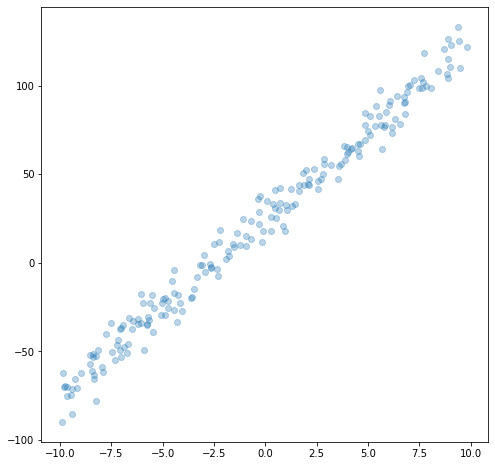

In [4]:
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, alpha=0.3)
plt.show()


2. make array and initilize value

In [124]:
leng = 10 # [0,10]
datanum= leng * 100#트레인 데이터 갯수

epoch =1500

# array for graph
loss_Array=np.zeros((epoch,1))
W_Array=np.zeros((epoch,1))
B_Array=np.zeros((epoch,1))
x_epoch=np.arange(epoch)

# dot for gradient decent
x_=np.zeros((datanum,1))
y_=np.zeros((datanum,1))
noise_y=np.zeros((datanum,1))
new_y=np.zeros((datanum,1))



3. make input and generate noise value 

In [125]:
#origin theta
origin_W = 2 
origin_B = 3

#put the intial values
for i in range(datanum):
    x_[i]=i*leng/datanum
    y_[i]=origin_W*x_[i]+origin_B
    noise_y[i]=np.random.normal(y_[i],2)
        

4. Processing Gradient decent(training)

In [126]:
lr=0.01 #learning Rate

W=0.001
B=0.001

for iter in range(epoch):
#     print("iter :" + str(iter+1))
    
    for i in range(datanum):
        new_y[i]=W*x_[i]+B
    
    #calculate the loss
    loss=(new_y-noise_y)*(new_y-noise_y) 
    loss=1/(2*datanum)*np.sum(loss)
    loss_Array[iter]=loss
    
#     print(loss)
    
    W_ = 1/datanum*np.sum((new_y-noise_y)*x_)
    B_ = 1/datanum*np.sum(new_y-noise_y)

    # update the parameters
    W = W - W_ * lr 
    B = B - B_ * lr
    
    W_Array[iter] = W
    B_Array[iter] = B
 

5. plotting the input data

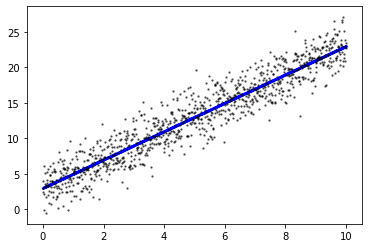

In [127]:
plt.scatter(x_,y_ ,c="b",s=2)
plt.scatter(x_,noise_y ,c="black",s=2,alpha=0.5 )#
plt.show()

6. plotting the output results

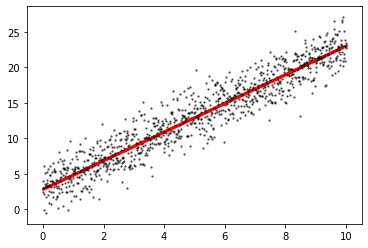

In [128]:
plt.scatter(x_,new_y ,c="r",s=2)
plt.scatter(x_,noise_y ,c="black",s=2,alpha=0.5 )
plt.show()

7. plotting the energy values

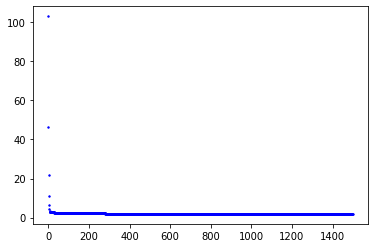

In [129]:
plt.scatter(x_epoch,loss_Array ,c="b",s=2)#loss 
plt.show()

8. plotting the model parameters

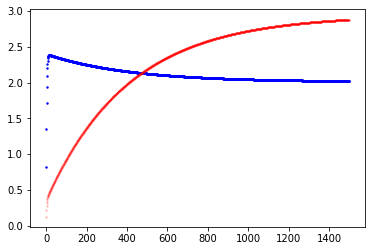

In [130]:
plt.scatter(x_epoch,W_Array ,c="b",s=2)#theta 1
plt.scatter(x_epoch,B_Array ,c="r",s=2,alpha=0.2 )#theta 0
plt.show()